In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [15]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:

cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=128, activation='relu'))
cnn.add(layers.Dropout(0.3))
cnn.add(layers.Dense(units=10, activation='softmax'))



In [17]:

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


loss, accuracy = cnn.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

num_samples = 5
indices = np.random.choice(len(x_test), num_samples, replace=False)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9104 - loss: 0.2833 - val_accuracy: 0.9768 - val_loss: 0.0752
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9672 - loss: 0.1193 - val_accuracy: 0.9797 - val_loss: 0.0773
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9711 - loss: 0.1260 - val_accuracy: 0.9847 - val_loss: 0.0723
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9722 - loss: 0.1531 - val_accuracy: 0.9827 - val_loss: 0.0878
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9720 - loss: 0.1899 - val_accuracy: 0.9849 - val_loss: 0.1163
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9705 - loss: 0.2941 - val_accuracy: 0.9835 - val_loss: 0.1610
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9715 - loss: 0.3803 - val_accuracy: 0.9832 - val_loss: 0.2424
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9693 - loss: 0.5413 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Image 1: Predicted=3, Actual=3
Probabilities: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Image 2: Predicted=3, Actual=3
Probabilities: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Image 3: Predicted=8, Actual=8
Probabilities: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Image 4: Predicted=7, Actual=7
Probabilities: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Image 5: Predicted=0, Actual=0
Probabilities: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


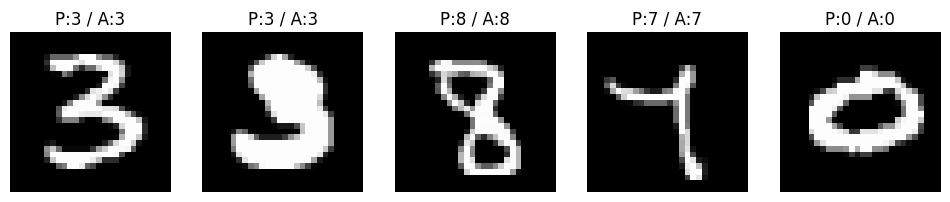

In [19]:
plt.figure(figsize=(12, 3))
for i, idx in enumerate(indices):
    sample_img = x_test[idx].reshape(1, 28, 28, 1)
    prediction = cnn.predict(sample_img)
    predicted_digit = np.argmax(prediction)
    actual_digit = np.argmax(y_test[idx])

    plt.subplot(1, num_samples, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"P:{predicted_digit} / A:{actual_digit}")
    
    print(f"\nImage {i+1}: Predicted={predicted_digit}, Actual={actual_digit}")
    print("Probabilities:", prediction.round(3))

plt.show()

In [21]:
cnn.save("mnist_cnn_model.h5")
print("✅ Model saved as mnist_cnn_model.h5")

✅ Model saved as mnist_cnn_model.h5
